# Project: Wrangling and Analyze Data

In [11]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\14387\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_enhanced_df=pd.read_csv('twitter-archive-enhanced.csv')
twitter_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
r=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')


In [7]:
with open('image_predctions.tsv','w') as file:
    file.write(r.text)

In [3]:
image_preds_df=pd.read_csv('image_predctions.tsv',sep='\t')
image_preds_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [32]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,)


In [34]:
tweet_ids_list=twitter_enhanced_df.tweet_id.to_list()

In [36]:
type(tweet_ids_list[0])

int

In [49]:
with open('tweet_json.txt','w') as f:
    f.write('tweet_id, created_at, retweet_count, favorite_count')
    f.write('\n')
    for tweet_id in tweet_ids_list:
        try:
            tweet=api.get_status(tweet_id)
            tmp=[str(tweet_id),str(tweet.created_at),str(tweet.retweet_count),str(tweet.favorite_count)]
            f.write(','.join(tmp))
            f.write('\n')
        except:
            continue


Rate limit reached. Sleeping for: 118
Rate limit reached. Sleeping for: 698


In [5]:
tweet_json_df=pd.read_csv('tweet_json.txt')
tweet_json_df.head()

,tweet_id,created_at,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,7150,34407
1,892177421306343426,2017-08-01 00:17:27+00:00,5378,29835
2,891815181378084864,2017-07-31 00:18:03+00:00,3542,22453
3,891689557279858688,2017-07-30 15:58:51+00:00,7361,37612
4,891327558926688256,2017-07-29 16:00:24+00:00,7904,35922


## Assessing Data


In [301]:
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [302]:
image_preds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [303]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2328 non-null   int64 
 1    created_at      2328 non-null   object
 2    retweet_count   2328 non-null   int64 
 3    favorite_count  2328 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [304]:
twitter_enhanced_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [306]:
(twitter_enhanced_df.rating_numerator<10).sum()

440

In [341]:
image_preds_df.


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality issues
**twitter_enhanced_table**

1.Missing data 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'

2.'doggo','floofer','pupper','puppo' columns have 'None' values as string

3.some 'rating_denominator' values differ from 10

4.some 'rating_numinator' are less than 10

5.some tweets are replies,'retweeted_status_id' or 'retweeted_status_user_id' have values

6.some values in 'name' column do not start with a capital letter

7.tweet_id shoul not be integer

8.timestamp should be in date type


**image_prediction_df**

1.Some images are not dogs

2.tweet_id is integer

**tweet_json_df**

1.tweet_id is integer

### Tidiness issues
**twitter_enhanced_table**

1.Some 'extended_urls' column's values have multiple values

2.'doggo','flopper','pupper', 'pupper' can form a column

3.table does not contain one type of observation

4.ratings can form a column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [56]:
# Make copies of original pieces of data
df_clean_tweets_enhanced=twitter_enhanced_df.copy()
df_clean_tweets_json=tweet_json_df.copy()
df_clean_image_preds=image_preds_df.copy()

# Quality issues
### twitter_enhanced_df: Missing data

#### Define:
 Since these missing values correspond to either not being replied or retweeted, the ones that have values will be disregarded in 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' and theese columns will be removed 'in_reply_to_status_id','in_reply_to_user_id' 

#### Code

In [57]:
df_clean_tweets_enhanced.retweeted_status_id.isnull().sum()

2175

In [58]:
df_clean_tweets_enhanced

2175

In [68]:
df_clean_tweets_enhanced=df_clean_tweets_enhanced.loc[df_clean_tweets_enhanced.retweeted_status_id.isnull()]

In [72]:
df_clean_tweets_enhanced.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

C:\Users\14387\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test

In [70]:
df_clean_tweets_enhanced.shape

(2175, 17)

In [73]:
(df_clean_tweets_enhanced.isnull()==False).sum()

tweet_id                 2175
in_reply_to_status_id      78
in_reply_to_user_id        78
timestamp                2175
source                   2175
text                     2175
expanded_urls            2117
rating_numerator         2175
rating_denominator       2175
name                     2175
doggo                    2175
floofer                  2175
pupper                   2175
puppo                    2175
dtype: int64

### twitter_enhanced_table :'doggo','floofer','pupper','puppo' columns have 'None' values as string

#### Define
Change None values which are string type to numpy NAN type

#### Code

In [75]:
df_clean_tweets_enhanced.replace(to_replace='None',value=np.nan,inplace=True)

C:\Users\14387\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#### Test

In [77]:
(df_clean_tweets_enhanced.doggo=='None').sum()

0

In [78]:
(df_clean_tweets_enhanced.floofer=='None').sum()

0

In [79]:
(df_clean_tweets_enhanced.pupper=='None').sum()

0

In [80]:
(df_clean_tweets_enhanced.puppo=='None').sum()

0

### twitter_enhanced_table:some 'rating_denominator' values differ from 10


#### Define

remove values that are zero or bellow 10

#### Code

In [85]:
df_clean_tweets_enhanced.query('rating_denominator==0').index

Int64Index([313], dtype='int64')

In [89]:
df_clean_tweets_enhanced.drop(index=df_clean_tweets_enhanced.query('rating_denominator==0').index,inplace=True)

C:\Users\14387\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
df_clean_tweets_enhanced.query('rating_denominator<10').index

Int64Index([516, 2335], dtype='int64')

In [93]:
df_clean_tweets_enhanced.drop(index=df_clean_tweets_enhanced.query('rating_denominator<10').index,inplace=True)

C:\Users\14387\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test


In [91]:
df_clean_tweets_enhanced.query('rating_denominator==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [94]:
df_clean_tweets_enhanced.query('rating_denominator<10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### twitter_enhanced_table:some 'rating_numinator' are less than 10


#### Define:
Extract numerator from 'text' column and replace it with wrong values in 'rating_numerator' then check for values bellow 10 and replace them with ten

#### Code:

In [103]:
df_clean_tweets_enhanced['rating_numerator']=df_clean_tweets_enhanced.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[0].astype(float)

In [107]:
df_clean_tweets_enhanced.rating_numerator=df_clean_tweets_enhanced.rating_numerator.apply(lambda x:10 if x<10 else x)

#### Test:

In [108]:
df_clean_tweets_enhanced.query('rating_numerator<10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### twitter_enhanced_table: some values in 'name' columns do not start with a capital letters

#### Define:

change first character to capital

#### Code:


In [112]:
df_clean_tweets_enhanced.name=df_clean_tweets_enhanced.name.str.capitalize()

#### Test:


In [123]:
df_clean_tweets_enhanced.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352           A
2353           A
2354           A
2355         NaN
Name: name, Length: 2172, dtype: object

#### twitter_enhanced_table: tweet_id should not be int

#### Define:
convert int type to string

#### Code

In [128]:
df_clean_tweets_enhanced.tweet_id=df_clean_tweets_enhanced.tweet_id.astype(str)

#### Test

In [129]:
df_clean_tweets_enhanced.dtypes

tweet_id                  object
in_reply_to_status_id    float64
in_reply_to_user_id      float64
timestamp                 object
source                    object
text                      object
expanded_urls             object
rating_numerator         float64
rating_denominator         int64
name                      object
doggo                     object
floofer                   object
pupper                    object
puppo                     object
dtype: object

### image_predition_table:some of the images are not dogs

#### Define:
remove rows that their images are not predicted as dogs, all p_dogs should be False

#### Code:

In [139]:
df_clean_image_preds=df_clean_image_preds[((df_clean_image_preds.p1_dog==False) & (df_clean_image_preds.p2_dog==False) & (df_clean_image_preds.p3_dog==False))==False]


#### Test:

In [141]:
(((df_clean_image_preds.p1_dog==False) & (df_clean_image_preds.p2_dog==False) & (df_clean_image_preds.p3_dog==False))==True).sum()

0

### image_prediction_table:tweet id is int

#### Define
convert int to string

#### code

In [142]:
df_clean_image_preds.tweet_id=df_clean_image_preds.tweet_id.astype(str)

C:\Users\14387\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Test:

In [143]:
df_clean_image_preds.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

# Tidiness Issues

### twitter_enhanced_table: 'doggo','flopper','pupper', 'pupper' can form a column

#### Define:
Aggregate above columns to one variable as one column

#### code

In [163]:
df_clean_tweets_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [183]:
df_clean_tweets_enhanced['dog_style']=np.nan
for col in ["doggo",'floofer','pupper','puppo']:
    df_clean_tweets_enhanced['dog_style'].fillna(df_clean_tweets_enhanced[col],inplace=True)

In [187]:
df_clean_tweets_enhanced.drop(columns=["doggo",'floofer','pupper','puppo'],inplace=True)

#### Test:

In [188]:
df_clean_tweets_enhanced.dog_style.value_counts()

pupper     224
doggo       87
puppo       24
floofer      9
Name: dog_style, dtype: int64

### twitter_enhanced_table:ratings can form a column

#### Define:
Merge to culumns 'rating_numerator' and 'rating_denominator' together into 'rating' column and remove them

#### Code

In [192]:
df_clean_tweets_enhanced['rating']=df_clean_tweets_enhanced.rating_numerator.divide(df_clean_tweets_enhanced.rating_denominator)

In [194]:
df_clean_tweets_enhanced.drop(columns=['rating_numerator','rating_denominator'],inplace=True)

#### Test

In [195]:
df_clean_tweets_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,dog_style,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3


In [197]:
df_clean_image_preds.shape

(1751, 12)

In [198]:
df_clean_tweets_enhanced.shape

(2172, 10)

In [206]:
df_clean_tweets_json.shape

(2328, 4)

In [209]:
twitter_master_df=df_clean_tweets_enhanced.merge(df_clean_tweets_json,on='tweet_id',how='left').merge(df_clean_image_preds,on="tweet_id",how='left')

In [211]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2171
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2172 non-null   object 
 1   in_reply_to_status_id  77 non-null     float64
 2   in_reply_to_user_id    77 non-null     float64
 3   timestamp              2172 non-null   object 
 4   source                 2172 non-null   object 
 5   text                   2172 non-null   object 
 6   expanded_urls          2115 non-null   object 
 7   name                   1493 non-null   object 
 8   dog_style              344 non-null    object 
 9   rating                 2172 non-null   float64
 10   created_at            2164 non-null   object 
 11   retweet_count         2164 non-null   float64
 12   favorite_count        2164 non-null   float64
 13  jpg_url                1684 non-null   object 
 14  img_num                1684 non-null   float64
 15  p1  

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [210]:
twitter_master_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [225]:
twitter_master_df[twitter_master_df.p1_dog==True].groupby('p1')[' retweet_count'].mean().sort_values(ascending=False)[0:10]

p1
standard_poodle          5520.571429
English_springer         4965.444444
Afghan_hound             4874.666667
Eskimo_dog               4502.444444
Saluki                   4217.000000
French_bulldog           4005.480000
Great_Pyrenees           3833.642857
flat-coated_retriever    3794.875000
Lakeland_terrier         3749.687500
Cardigan                 3710.588235
Name:  retweet_count, dtype: float64

In [226]:
twitter_master_df[twitter_master_df.p1_dog==True].groupby('p1')[' favorite_count'].mean().sort_values(ascending=False)[0:10]

p1
Saluki                     21175.250000
French_bulldog             16635.720000
Afghan_hound               14975.333333
black-and-tan_coonhound    14919.500000
flat-coated_retriever      14785.000000
Irish_water_spaniel        14223.000000
standard_poodle            13868.428571
English_springer           13687.888889
Cardigan                   13287.882353
Leonberg                   12881.666667
Name:  favorite_count, dtype: float64

In [227]:
twitter_master_df[twitter_master_df.p1_dog==True].groupby('p1')['p1_conf'].mean().sort_values(ascending=False)[0:10]

p1
komondor                0.972531
clumber                 0.946718
Brittany_spaniel        0.874545
keeshond                0.844431
bull_mastiff            0.815618
Bernese_mountain_dog    0.801816
French_bulldog          0.770627
pug                     0.759223
Samoyed                 0.747088
Pomeranian              0.743606
Name: p1_conf, dtype: float64

### Insights:
1.Tweets containing standard Poodle were amongst the most retweeted tweets on average

2.Tweets containing Saluki breed were amongs the most liked tweets on average

3.The image recognition system was able to recognize the Komondor breed with highest confidence score on average

### Visualization

<AxesSubplot:title={'center':'Retweets Trend'}, xlabel='time(day)', ylabel='number of retweets'>

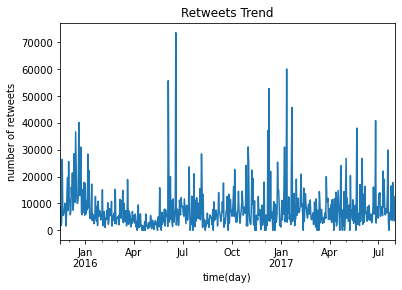

In [250]:
twitter_master_df.resample('D',on=' created_at')[' retweet_count'].sum().plot(title="Retweets Trend",xlabel="time(day)",ylabel="number of retweets")

<AxesSubplot:title={'center':'Retweets Trend'}, xlabel='time(month)', ylabel='number of retweets'>

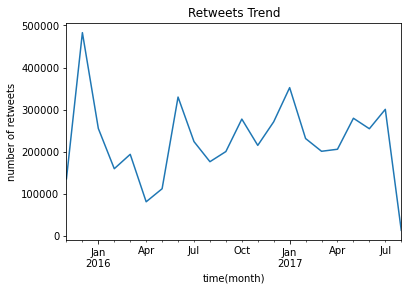

In [251]:
twitter_master_df.resample('M',on=' created_at')[' retweet_count'].sum().plot(title="Retweets Trend",xlabel="time(month)",ylabel="number of retweets")

In [300]:
twitter_master_df.source.str.extract(r'(download/.+")').value_counts()

download/iphone" rel="nofollow"    2039
dtype: int64